In [59]:
import pandas as pd
import plotly.express as px

# Charger le dataset
df = pd.read_csv('ds_salaries.csv')

df.info()
df.company_location.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [58]:
import plotly.express as px
df2 = px.data.gapminder().query("year==2007").query("continent=='Americas'")
fig = px.choropleth(df2, locations="iso_alpha",
                    color="pop",
                    hover_name="country",
                    projection="natural earth")
fig.show()

In [64]:
df2

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
143,Bolivia,Americas,2007,65.554,9119152,3822.137084,BOL,68
179,Brazil,Americas,2007,72.390,190010647,9065.800825,BRA,76
251,Canada,Americas,2007,80.653,33390141,36319.235010,CAN,124
287,Chile,Americas,2007,78.553,16284741,13171.638850,CHL,152
311,Colombia,Americas,2007,72.889,44227550,7006.580419,COL,170
359,Costa Rica,Americas,2007,78.782,4133884,9645.061420,CRI,188
395,Cuba,Americas,2007,78.273,11416987,8948.102923,CUB,192
443,Dominican Republic,Americas,2007,72.235,9319622,6025.374752,DOM,214
455,Ecuador,Americas,2007,74.994,13755680,6873.262326,ECU,218


In [68]:
import pycountry

# Création d'une nouvelle colonne pour stocker les alpha_3
df['company_loc'] = ''
df['employee_loc'] = ''

# Remplacement des valeurs de la colonne 'company_location'
for alpha_2 in df['company_location'].unique():
    country = pycountry.countries.lookup(alpha_2)
    alpha_3 = country.alpha_3
    df.loc[df['company_location'] == alpha_2, 'company_loc'] = alpha_3

for alpha_2 in df['employee_residence'].unique():
    country = pycountry.countries.lookup(alpha_2)
    alpha_3 = country.alpha_3
    df.loc[df['employee_residence'] == alpha_2, 'employee_loc'] = alpha_3

countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.name

# ajouter une colonne avec les noms complets de chaque pays
df['country_name'] = df['company_location'].map(countries)

In [69]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_loc,employee_loc,country_name
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,DEU,DEU,Germany
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,JPN,JPN,Japan
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,GBR,GBR,United Kingdom
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,HND,HND,Honduras
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,USA,USA,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,USA,USA,United States
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,USA,USA,United States
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,USA,USA,United States
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,USA,USA,United States


In [67]:
fig = px.choropleth(df, locations="company_loc",
                    color="salary_in_usd",
                    hover_name="company_location",
                    projection="natural earth")
fig.show()

In [70]:
df.job_title.unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [86]:
import numpy as np

# Définition des conditions pour chaque famille
conditions = [
    df['job_title'].str.contains('Data Scientist|Data Science|Head of Data'),
    df['job_title'].str.contains('Machine Learning|ML|AI|NLP|Computer Vision'),
    df['job_title'].str.contains('Data Engineer|Big Data|Data Architect|Data Specialist|ETL'),
    df['job_title'].str.contains('Business Analyst|BI'),
    df['job_title'].str.contains('Data Analytics|Data Analyst|Analytics Engineer'),
    df['job_title'].str.contains('Research')
]

# Définition des valeurs à assigner pour chaque condition
values = ['Data Science', 'Machine Learning Engineering', 'Data Engineering', 'Business Intelligence', 'Data Analytics', 'Research']

# Création d'une nouvelle colonne "job_family" en utilisant numpy.select()
df['job_family'] = np.select(conditions, values, default='Other')


In [93]:
df[df.job_family == 'Research']

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_loc,employee_loc,country_name,job_family
26,26,2020,EN,FT,Research Scientist,42000,USD,42000,NL,50,NL,L,NLD,NLD,Netherlands,Research
33,33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M,USA,USA,United States,Research
72,72,2021,EN,FT,Research Scientist,60000,GBP,82528,GB,50,GB,L,GBR,GBR,United Kingdom,Research
106,106,2021,MI,FT,Research Scientist,235000,CAD,187442,CA,100,CA,L,CAN,CAN,Canada,Research
146,146,2021,MI,FT,Research Scientist,53000,EUR,62649,FR,50,FR,M,FRA,FRA,France,Research
174,174,2021,SE,FT,Research Scientist,51400,EUR,60757,PT,50,PT,L,PRT,PRT,Portugal,Research
194,194,2021,SE,FT,Research Scientist,120500,CAD,96113,CA,50,CA,L,CAN,CAN,Canada,Research
203,203,2021,SE,FT,Research Scientist,50000,USD,50000,FR,100,US,S,USA,FRA,United States,Research
211,211,2021,MI,FT,Research Scientist,48000,EUR,56738,FR,50,FR,S,FRA,FRA,France,Research
236,236,2021,MI,FT,Research Scientist,80000,CAD,63810,CA,100,CA,M,CAN,CAN,Canada,Research


In [94]:
# Calcul du salaire moyen pour chaque famille de métiers
salaries = df.groupby('job_family')['salary_in_usd'].mean().round(2)

# Tri des salaires par ordre décroissant
salaries = salaries.to_dict()

print(salaries)


{'Business Intelligence': 74755.17, 'Data Analytics': 99972.49, 'Data Engineering': 119242.63, 'Data Science': 120167.03, 'Machine Learning Engineering': 102018.99, 'Research': 109019.5}


In [119]:
# Calcul du salaire moyen pour chaque famille de métiers
salaries = df.groupby(['job_family', 'country_name', 'work_year', 'experience_level', 'remote_ratio', 'company_size'])['salary_in_usd'].mean().round(2)

# Tri des salaires par ordre décroissant
salaries = salaries.to_dict()

salaries

{('Business Intelligence', 'Kenya', 2021, 'EN', 100, 'S'): 9272.0,
 ('Business Intelligence', 'United States', 2020, 'MI', 0, 'M'): 98000.0,
 ('Business Intelligence', 'United States', 2021, 'EN', 50, 'S'): 55000.0,
 ('Business Intelligence', 'United States', 2021, 'EX', 100, 'L'): 150000.0,
 ('Business Intelligence', 'United States', 2021, 'MI', 50, 'L'): 36259.0,
 ('Business Intelligence', 'United States', 2021, 'MI', 100, 'M'): 100000.0,
 ('Data Analytics', 'Canada', 2021, 'SE', 100, 'M'): 71786.0,
 ('Data Analytics', 'Canada', 2022, 'EN', 0, 'M'): 59500.0,
 ('Data Analytics', 'Canada', 2022, 'MI', 0, 'M'): 80000.0,
 ('Data Analytics', 'Canada', 2022, 'MI', 50, 'L'): 70912.0,
 ('Data Analytics', 'Canada', 2022, 'MI', 100, 'S'): 75000.0,
 ('Data Analytics', 'Canada', 2022, 'SE', 100, 'M'): 95650.0,
 ('Data Analytics', 'Denmark', 2021, 'SE', 100, 'L'): 88654.0,
 ('Data Analytics', 'France', 2020, 'MI', 50, 'L'): 46759.0,
 ('Data Analytics', 'France', 2021, 'EN', 50, 'M'): 59102.0,
 ('

In [124]:
import pandas as pd

salaries_df = pd.concat([pd.DataFrame([(key[0], key[1], key[2], key[3], key[4], key[5], value)], columns=['job family', 'country', 'year', 'experience_level', 'remote_ratio', 'company_size', 'mean_salary']) for key, value in salaries.items()], ignore_index=True)

salaries_df.to_csv('echo.csv')



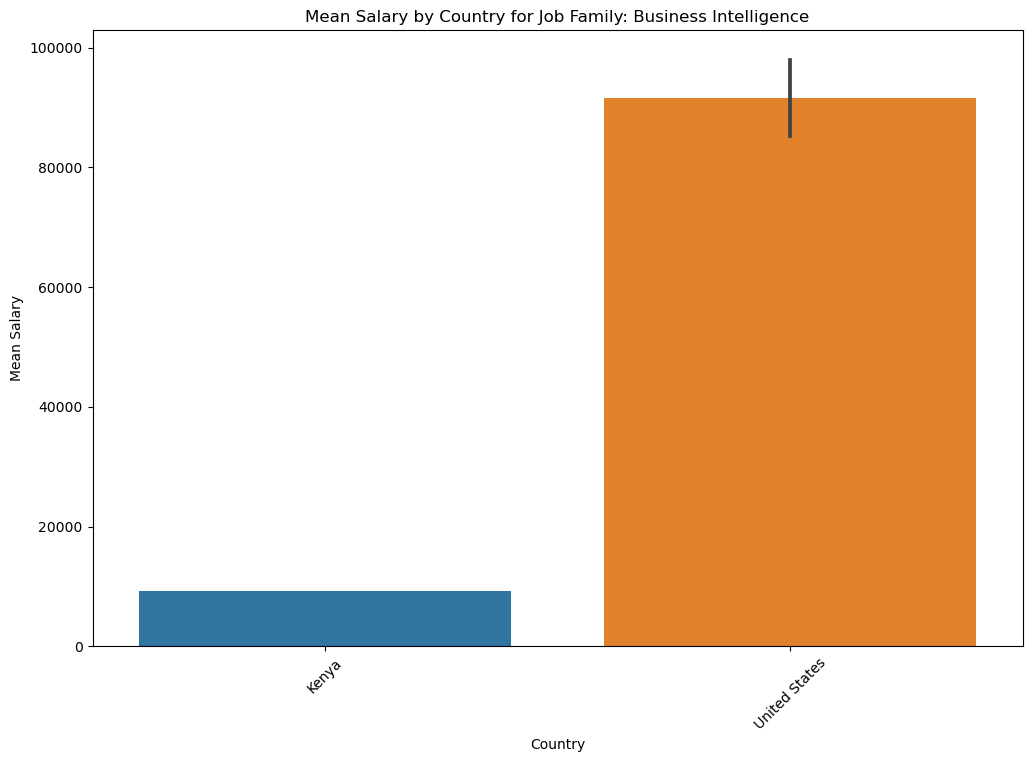

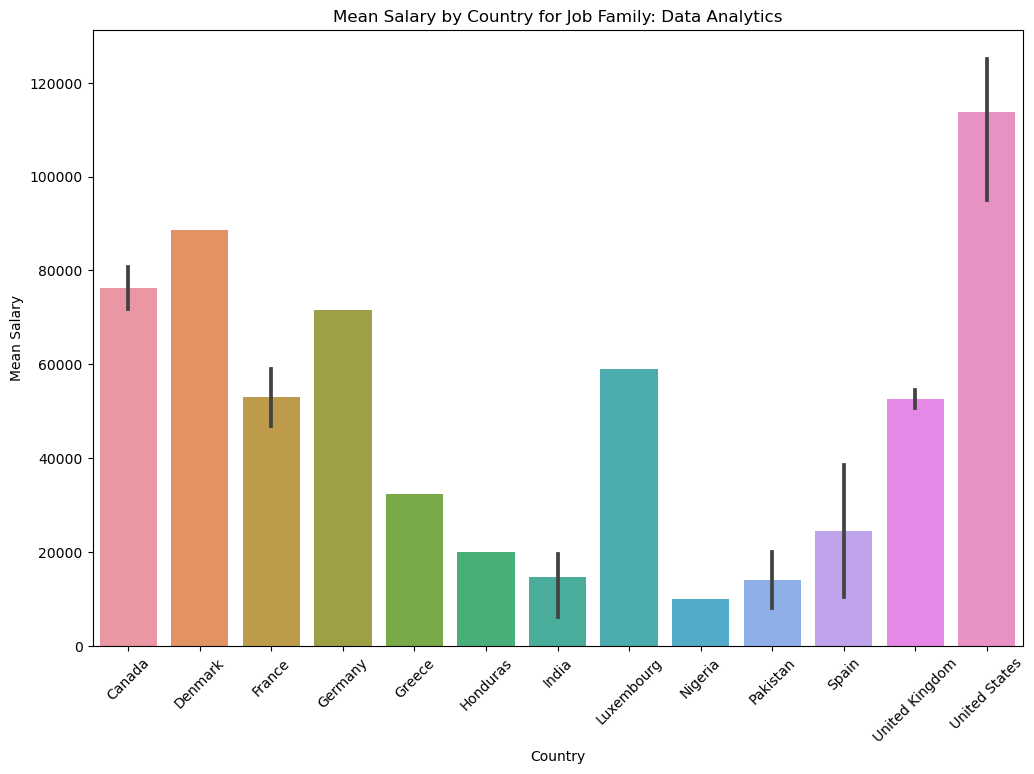

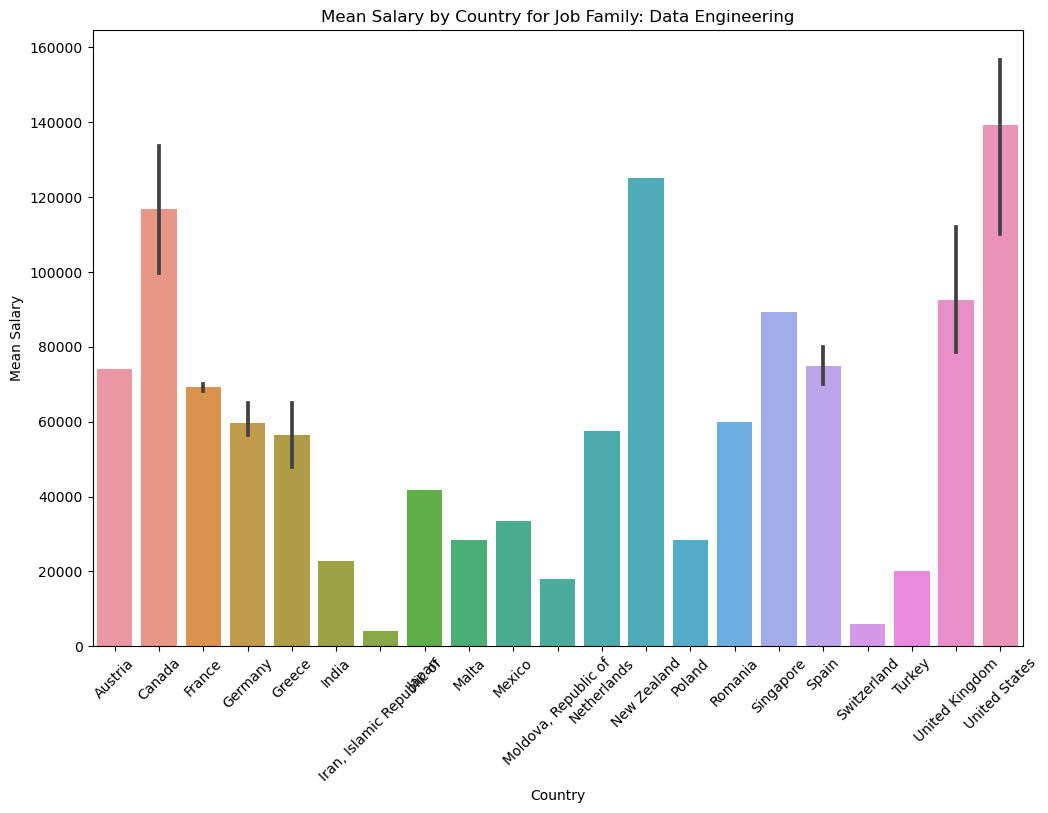

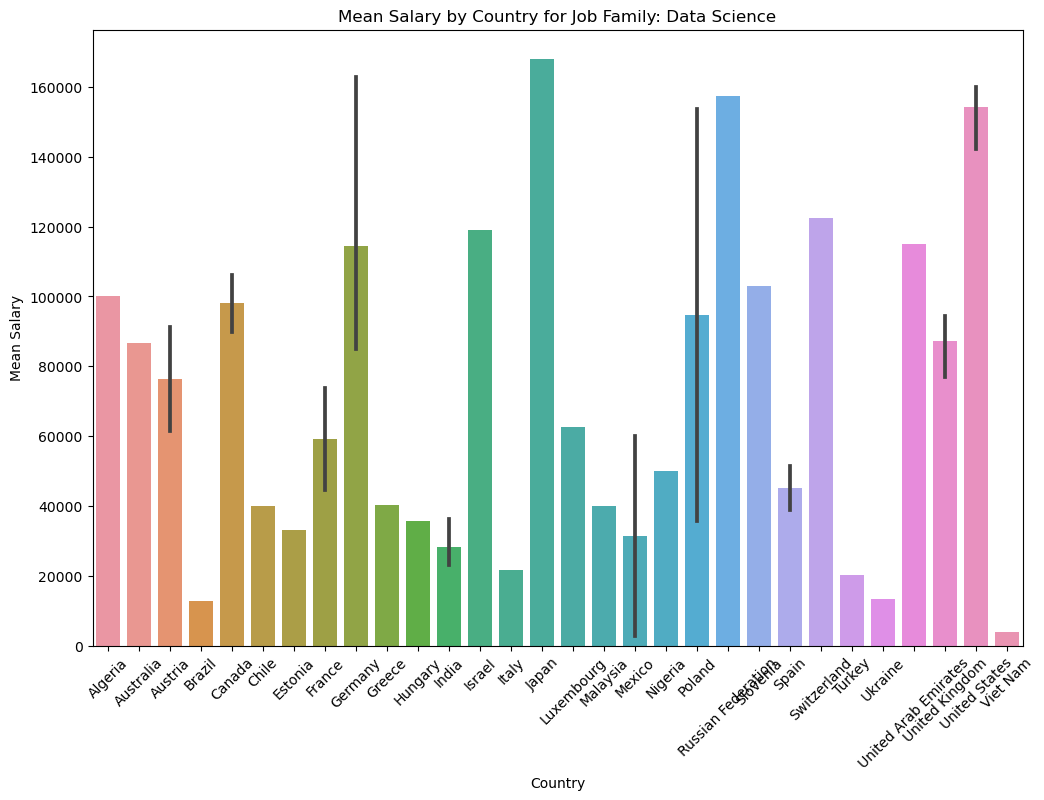

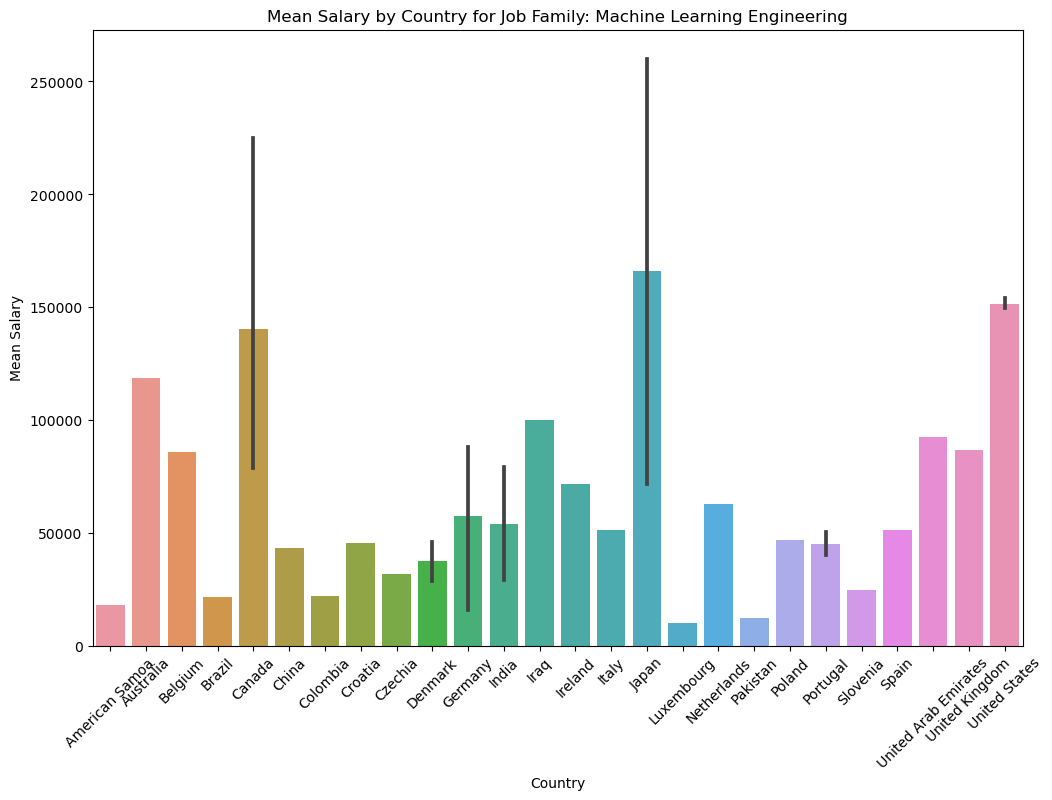

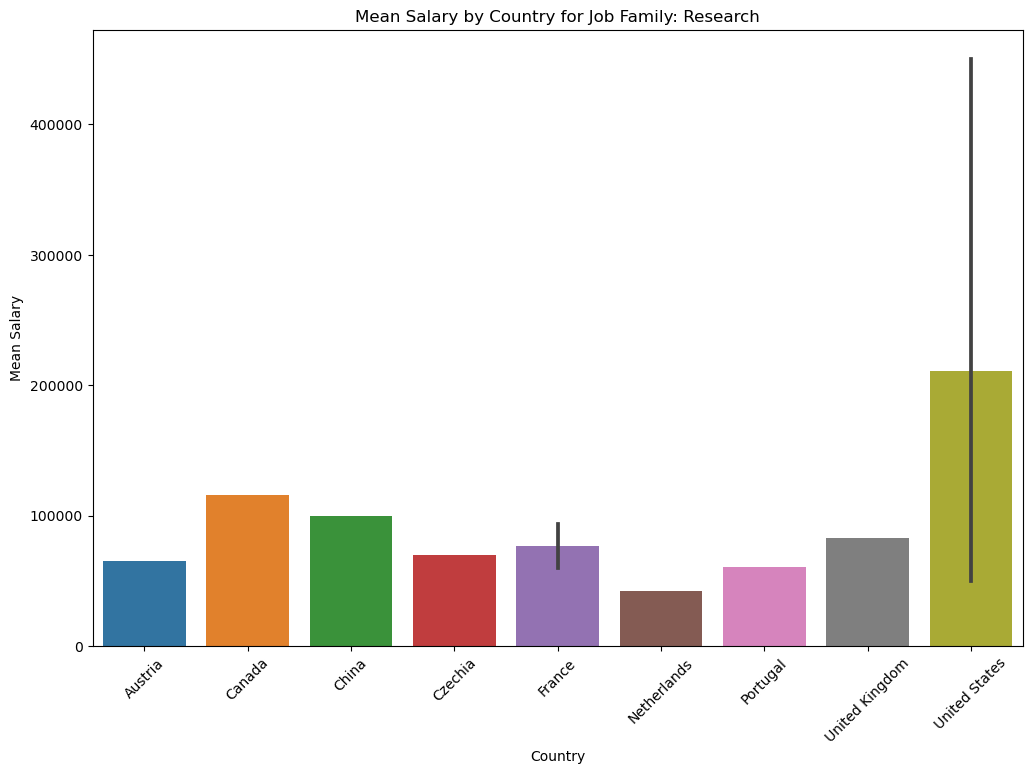

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for job_family in salaries_df['job family'].unique():
    plt.figure(figsize=(12, 8))
    sns.barplot(data=salaries_df[salaries_df['job family'] == job_family], x='country', y='mean_salary')
    plt.title(f'Mean Salary by Country for Job Family: {job_family}')
    plt.xticks(rotation=45)
    plt.ylabel('Mean Salary')
    plt.xlabel('Country')
    plt.show()


In [112]:
import plotly.express as px
import pandas as pd

for job_family in salaries_df['job family'].unique():
    fig = px.bar(salaries_df[salaries_df['job family'] == job_family], x='country', y='mean_salary', title=f'Mean Salary by Country for Job Family: {job_family}')
    fig.update_xaxes(tickangle=45)
    fig.show()


In [123]:
# Regrouper les données par famille de métiers et année et calculer le salaire moyen
grouped_data = salaries_df.groupby(["job family", "worked_year"])["mean_salary"].mean().unstack()

# Dessiner le graphique en barres empilées
grouped_data.plot(kind="bar", stacked=True)

# Ajouter un titre et des étiquettes d'axe
plt.title("Salaire moyen par année et par famille de métiers")
plt.xlabel("Année")
plt.ylabel("Salaire moyen")
plt.legend(title="Famille de métiers")
plt.show()


KeyError: 'worked_year'